In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# Coin flip simulation

### Simulation of 16 coin flips

In [71]:
n_simul = 1000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(16)
    res[i] = np.sum(simul<=0.5)

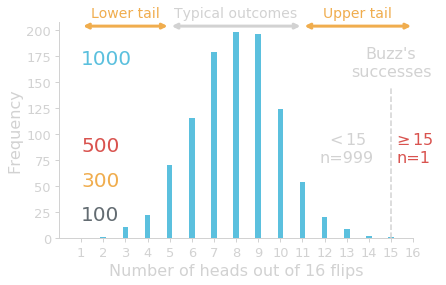

In [84]:
#fig, ax1 = plt.subplots(figsize=(6,4))
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.20, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()

size_list = [100, 300, 500, 1000]
color_list = ["gray", "orange", "red", "blue"]

ax_list = [ax1, ax2, ax3, ax4]

for i in range(4):
    #x,y = st.to_dotplot(res[:size_list[i]], kind="bins", scale=1, nbins=np.arange(-0.5, 16.5, 1))
    #ax_list[i].scatter(x, y, s=10, color=colors[color_list[i]])
    ax_list[i].hist(res[:size_list[i]], bins=np.arange(-0.125, 16.2, 0.25), color=colors[color_list[i]])
    ax_list[i].text(1, size_list[i]/6, "{}".format(size_list[i]), size=20, color=colors[color_list[i]])

ax5.set_ylim(0,1)
ax5.axvline(15, ymax=0.7, color=colors["lightgray"], ls="--")
ax5.text(15, 0.75, "Buzz's\nsuccesses", size=16, color=colors["lightgray"], ha="center")
ax5.text(13, 0.35, "$<15$\nn={}".format(np.sum(res<15)), size=16, color=colors["lightgray"], ha="center")
ax5.text(16, 0.35, "$\geq15$\nn={}".format(np.sum(res>=15)), size=16, color=colors["red"], ha="center")

ax6.set_ylim(0,1)
ax6.annotate(s='', xy=(5,0.98), xytext=(11,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=3))
ax6.annotate(s='', xy=(1,0.98), xytext=(5,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=3))
ax6.annotate(s='', xy=(11,0.98), xytext=(16,0.98), 
             arrowprops=dict(arrowstyle='<->', color=colors["orange"],
                            linewidth=3))
ax6.text(8, 1.02, "Typical outcomes", size=14, ha="center", color=colors["lightgray"])
ax6.text(3, 1.02, "Lower tail", size=14, ha="center", color=colors["orange"])
ax6.text(13.5, 1.02, "Upper tail", size=14, ha="center", color=colors["orange"])


ax4.set_ylim(0)
    
for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.axis("off")

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 16)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(1, 17))
    ax.set_yticks(np.arange(0, 220, 25))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Number of heads out of 16 flips", size=16, color=colors["lightgray"])
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(ax4.get_ylim())
    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip.svg", transparent=True)

### Simulation of 28 coin flips

In [3]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(16)
    res[i] = np.sum(simul>=0.5)

print("pvalue = {}".format(np.sum(res>=16)/n_simul))

pvalue = 0.2795


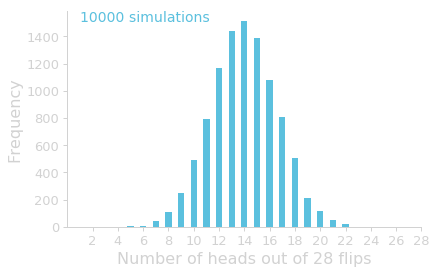

In [4]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])

ax1.hist(res, bins=np.arange(-0.25, 28.3, 0.5), color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.set_xlabel("Number of heads out of 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.text(1, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip2.svg", transparent=True)

In [5]:
def multicolor_label(ax,list_of_strings,list_of_colors,axis='x',anchorpad=0,**kw):
    """this function creates axes labels with multiple colors
    ax specifies the axes object where the labels should be drawn
    list_of_strings is a list of all of the text items
    list_if_colors is a corresponding list of colors for the strings
    axis='x', 'y', or 'both' and specifies which label(s) should be drawn"""
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    # x-axis label
    if axis=='x' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',**kw)) 
                    for text,color in zip(list_of_strings,list_of_colors) ]
        xbox = HPacker(children=boxes,align="center",pad=0, sep=5)
        anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=anchorpad,frameon=False,bbox_to_anchor=(0.2, -0.09),
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_xbox)

    # y-axis label
    if axis=='y' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',rotation=90,**kw)) 
                     for text,color in zip(list_of_strings[::-1],list_of_colors) ]
        ybox = VPacker(children=boxes,align="center", pad=0, sep=5)
        anchored_ybox = AnchoredOffsetbox(loc=3, child=ybox, pad=anchorpad, frameon=False, bbox_to_anchor=(-0.10, 0.2), 
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_ybox)



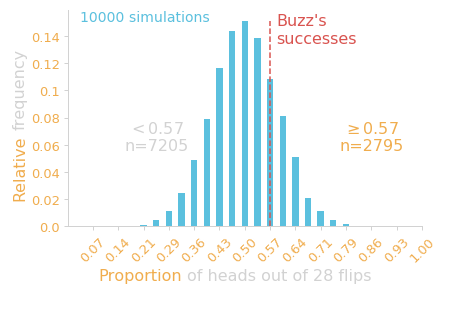

In [7]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])
ax2 = ax1.twinx()

ax1.hist(res, bins=np.arange(-0.25, 28.3, 0.5), color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xticklabels(["{:.2f}".format(z) for z in ax.get_xticks()/28], rotation=45, ha="center", color=colors["orange"])
    ax.set_yticklabels(ax.get_yticks()/n_simul, color=colors["orange"])
    ax.text(1, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

ax2.set_ylim(0,1)
ax2.axis("off")
for ax in [ax2]:
    ax.axvline(16, ymax=0.95, color=colors["red"], ls="--")
    ax.text(16.5, 0.85, "Buzz's\nsuccesses", size=16, color=colors["red"], ha="left")
    ax.text(7, 0.35, "$<{:.2f}$\nn={}".format(16/28, np.sum(res<16)), size=16, color=colors["lightgray"], ha="center")
    ax.text(24, 0.35, "$\geq{:.2f}$\nn={}".format(16/28, np.sum(res>=16)), size=16, color=colors["orange"], ha="center")


    
multicolor_label(ax1,('Proportion','of heads out of 28 flips'),(colors["orange"], colors["lightgray"]), axis='x', 
                 size=16, anchorpad=-4)
multicolor_label(ax1,('Relative','frequency'),(colors["lightgray"], colors["orange"]), axis='y', 
                 size=16, anchorpad=-2)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip2-prop.svg", transparent=True)

In [8]:
print("pvalue = {}".format(np.sum(res>=16)/n_simul))

pvalue = 0.2795


##### Z score

In [9]:
z = ((16/28)-0.5)/np.sqrt((0.5*(1-0.5))/28)
print("z = {}".format(z))
print("pval from z = {}".format(1-stats.norm.cdf(z)))

z = 0.7559289460184542
pval from z = 0.2248458989844455


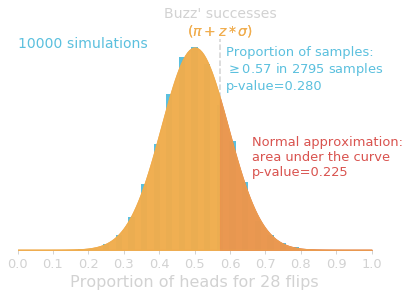

In [14]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.74])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()


ax1.hist(res/28, bins=np.arange(-0.25, 28.3, 0.5)/28, normed=True, color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("Proportion of heads for 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.axvline(16/28, ymax=0.99, color=colors["lightgray"], ls="--")
    ax.text(16/28, 1.14*ax.get_ylim()[1], "Buzz' successes", size=14, color=colors["lightgray"], ha="center", va="top")
    ax.text(0, 0.95*ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")
    
#normal
norm_mu = 0.5
norm_sigma = np.sqrt((norm_mu*(1-norm_mu))/28)
lim = norm_mu + (((16/28)-norm_mu)/norm_sigma)*norm_sigma #mean+0.77*SD
x1 = np.linspace(0,lim,100)
x2 = np.linspace(lim,1,100)
ynorm1 = stats.norm.pdf(x1, norm_mu, norm_sigma)
ynorm2 = stats.norm.pdf(x2, norm_mu, norm_sigma)
#normal
ax5.fill_between(x1, ynorm1*2, color=colors["orange"], alpha=0.7, zorder=100)
ax5.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)
ax5.text(16/28, 1.14*ax.get_ylim()[1], "\n($\pi+z*\sigma$)", size=14, color=colors["orange"], ha="center", va="top")

ax4.fill_between(np.concatenate([x1, x2]), np.concatenate([ynorm1, ynorm2])*2, color=colors["orange"], alpha=0.7, zorder=100)

ax2.text(18.5/28, 0.35*ax.get_ylim()[1], "Normal approximation:\narea under the curve\np-value={:.3f}".format(1-stats.norm.cdf(z)), size=13, color=colors["red"], ha="left")
ax3.text(16.5/28, 0.75*ax.get_ylim()[1], "Proportion of samples:\n$\geq{:.2f}$ in {} samples\np-value={:.3f}".format(16/28, np.sum(res>=16), np.sum(res>=16)/n_simul), size=13, color=colors["blue"], ha="left")

ax6.fill_between(np.concatenate([x1, x2]), np.concatenate([ynorm1, ynorm2])*2, color=colors["orange"], alpha=0.7, zorder=100)
ax6.text(16/28, 1.14*ax.get_ylim()[1], "\n($\pi+z*\sigma$)", size=14, color=colors["orange"], ha="center", va="top")

    
#plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-coinflip-zscore.svg", transparent=True)

In [11]:
print("Exact binomial:\np-value = {}".format(np.sum(stats.binom.pmf(range(29), 28, 0.5)[16:])))

Exact binomial:
p-value = 0.285794094204904


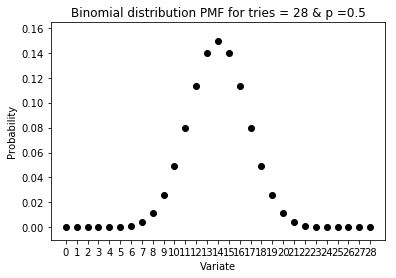

In [3]:
def binom_pmf(n=28, p=0.5):
    # There are n+1 possible number of "successes": 0 to n.
    x = range(n+1)
    y = stats.binom.pmf(x, n, p)
    plt.plot(x,y,"o", color="black")

    # Format x-axis and y-axis.
    plt.axis([-(max(x)-min(x))*0.05, max(x)*1.05, -0.01, max(y)*1.10])
    plt.xticks(x)
    plt.title("Binomial distribution PMF for tries = {0} & p ={1}".format(
            n,p))
    plt.xlabel("Variate")
    plt.ylabel("Probability")

    #plt.draw()
    
binom_pmf()

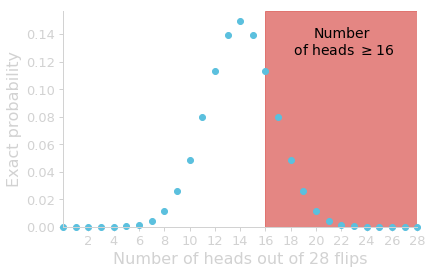

In [125]:
n = 28
p = 0.5
x = range(n+1)
y = stats.binom.pmf(x, n, p)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.20, 0.82, 0.75])

ax1.plot(x, y, "o", color=colors["blue"], clip_on=False)

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_xlim(0, 28)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(2, 29, 2))
    ax.set_xlabel("Number of heads out of 28 flips", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Exact probability", size=16, color=colors["lightgray"])
    ax.axvspan(16, 28, color=colors["red"], alpha=0.7)
    ax.text(22, 0.125, "Number\n of heads $\geq16$", size=14, ha="center", color="k")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/figs-gc/src-figs-gc/binomial-coinflip.pdf", transparent=True)

# Long run probability

In [102]:
flips = np.random.randint(low=0, high=2, size=10000)

In [103]:
prop_flips = [np.sum(flips[:i]/len(flips[:i])) for i in range(len(flips))]

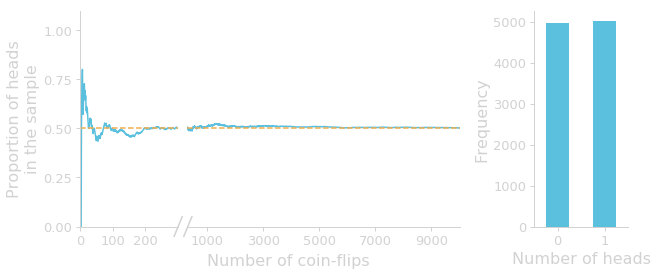

In [111]:
i1 = 300

fig = plt.figure(figsize=(9,4))
ax2 = fig.add_axes([0.285, 0.20, 0.42, 0.75])
ax1 = fig.add_axes([0.12, 0.20, 0.15, 0.75])
ax3 = fig.add_axes([0.82, 0.20, 0.145, 0.75])


ax1.plot(np.arange(0, i1)+1, prop_flips[:i1], color=colors["blue"], clip_on=True)
ax2.plot(np.arange(i1, len(prop_flips))+1, prop_flips[i1:], color=colors["blue"], clip_on=True)
ax3.hist(flips, bins=[-0.25, 0.25, 0.75, 1.25], color=colors["blue"])

for ax in [ax1, ax2]:
    ax.set_ylim(0, 1.1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.axhline(0.5, ls="--", color=colors["orange"])

for ax in [ax2]:
    ax.set_yticks([])
    ax.set_ylim(0)
    ax.set_xlim(i1+1, len(prop_flips)+1)
    for spine in ["left"]:
        ax.spines[spine].set_visible(False)
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.text(1000, -0.2, "Number of coin-flips", size=16, color=colors["lightgray"])
    ax.set_xticks(np.arange(1000, 10000, 2000))

for ax in [ax1, ax3]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])

for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(1, i1+1)
    ax.set_xticks(np.arange(0, i1, 100))
    ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Proportion of heads\nin the sample", size=16, color=colors["lightgray"])
    ax.plot([i1-10, i1+15], [-0.05, 0.05], clip_on=False, color=colors["lightgray"])
    ax.plot([i1+20, i1+45], [-0.05, 0.05], clip_on=False, color=colors["lightgray"])

for ax in [ax3]:
    #ax.set_ylim(0, 1.1)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.set_xlabel("Number of heads", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-long-run-coinflip.svg", transparent=True)

# Two tailed vs one tail tests

In [3]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    simul = np.random.rand(28)
    res[i] = np.sum(simul>=0.5)

successes = 20

In [4]:
z = ((successes/28)-0.5)/np.sqrt((0.5*(1-0.5))/28)
print("z = {}".format(z))
print("pval from z = {}".format(1-stats.norm.cdf(z)))

z = 2.267786838055364
pval from z = 0.011671101006445417


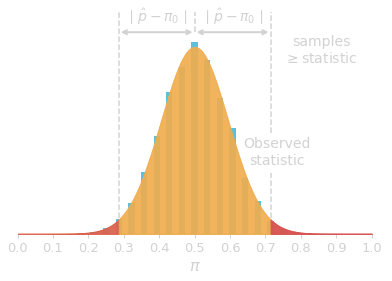

In [12]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.7])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()


ax1.hist(res/28, bins=np.arange(-0.25, 28.3, 0.5)/28, normed=True, color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_ylim(0)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("$\pi$", size=16, color=colors["lightgray"])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    #observed result (upper tail)
    ax.axvline(successes/28, ymax=0.3, color=colors["lightgray"], ls="--")
    ax.text((successes+0.5)/28, 0.345*ax.get_ylim()[1], "Observed\nstatistic", size=14, color=colors["lightgray"], ha="center")
    ax.axvline(successes/28, ymin=0.5, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)

for ax in [ax2, ax3, ax4]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax3]:
    #center of distribution
    ax.axvline(0.5, ymin=1, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    #annotations
    ax.text((0.5+successes/28)/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["lightgray"], ha="center")
    ax.annotate(s='', xy=(0.5,1*ax.get_ylim()[1]), xytext=(successes/28,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))
    #lower tail
    ax.axvline(1-(successes/28), ymin=0, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    ax.text((0.5+(1-(successes/28)))/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["lightgray"], ha="center")
    ax.annotate(s='', xy=(1-(successes/28),1*ax.get_ylim()[1]), xytext=(0.5,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["lightgray"],
                            linewidth=2))

for ax in [ax4]:
    ax.text((1+successes/28)/2, 0.85*ax.get_ylim()[1], "samples\n$\geq$statistic", size=14, color=colors["lightgray"], ha="center")

#normal
norm_mu = 0.5
norm_sigma = np.sqrt((norm_mu*(1-norm_mu))/28)
lim_down = norm_mu - (((successes/28)-norm_mu)/norm_sigma)*norm_sigma
lim_up = norm_mu + (((successes/28)-norm_mu)/norm_sigma)*norm_sigma
x0 = np.linspace(0,lim_down,100)
x1 = np.linspace(lim_down,lim_up,100)
x2 = np.linspace(lim_up,1,100)
ynorm0 = stats.norm.pdf(x0, norm_mu, norm_sigma)
ynorm1 = stats.norm.pdf(x1, norm_mu, norm_sigma)
ynorm2 = stats.norm.pdf(x2, norm_mu, norm_sigma)

#normal
ax2.fill_between(np.concatenate([x0, x1]), np.concatenate([ynorm0,ynorm1])*2, color=colors["orange"], alpha=0.7, zorder=100)
ax2.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)

ax3.fill_between(x0, ynorm0*2, color=colors["red"], alpha=0.8, zorder=100)
ax3.fill_between(x1, ynorm1*2, color=colors["orange"], alpha=0.7, zorder=100)
ax3.fill_between(x2, ynorm2*2, color=colors["red"], alpha=0.8, zorder=100)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/simulation-graph-two-tails.svg", transparent=True)

# UCLA - USC rivalry

## Football

In [10]:
# data from https://en.wikipedia.org/wiki/UCLA–USC_rivalry#Football_series_record
football = pd.read_csv("data-src/ucla-usc-football-rivalry.csv")

In [25]:
n_games = football.Winner.count()
n_usc = football.Winner[football.Winner=="USC"].count()
n_ucla = football.Winner[football.Winner=="UCLA"].count()
n_tie = football.Winner[football.Winner=="TIE"].count()


In [20]:
n_ucla, n_usc, n_tie

(31, 48, 7)

In [21]:
res = np.zeros(10000)
for i in range(10000):
    sample = np.random.rand(n_games)
    res[i] = np.sum(sample<0.5)

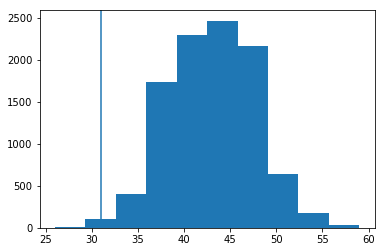

In [26]:
plt.hist(res)
plt.axvline(n_ucla)

## Basketball

In [3]:
# data from https://en.wikipedia.org/wiki/UCLA_Bruins_men%27s_basketball#Record_vs._Pac-12_opponents
basketball = pd.read_csv("data-src/ucla-usc-basketball-rivalry.csv")
basketball

,Opponent,Wins,Losses,Pct.,Streak
0,Arizona,55,43,0.561,Arizona 1
1,Arizona St.,68,19,0.782,UCLA 4
2,Cal,137,103,0.571,UCLA 1
3,Colorado,11,2,0.846,UCLA 3
4,Oregon,87,35,0.713,UCLA 1
5,Oregon St.,95,37,0.720,UCLA 2
6,Stanford,144,93,0.608,UCLA 2
7,USC,140,109,0.562,UCLA 1
8,Utah,9,7,0.562,UCLA 1
9,Washington,98,42,0.700,UCLA 7


In [4]:
ucla_usc = basketball[basketball.Opponent=="USC"]

ucla_wins = ucla_usc.Wins.values[0]
usc_wins = ucla_usc.Losses.values[0]

n_games = ucla_wins + usc_wins

phat = ucla_wins/n_games
phat

0.56224899598393574

In [6]:
n_simul = 10000

res = np.zeros(n_simul)

for i in range(n_simul):
    sample = np.random.rand(n_games)
    res[i] = np.sum(sample<0.5)/n_games

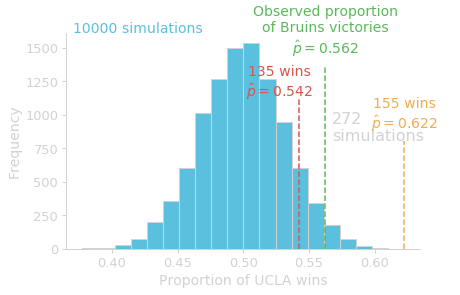

In [7]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

ax1.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom", "left"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_ylim(0)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])
    ax.set_ylabel("Frequency", size=14, color=colors["lightgray"])
    ax.text(ax.get_xlim()[0]+0.005, ax.get_ylim()[1], "10000 simulations", size=14, color=colors["blue"], ha="left")

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.85, color=colors["green"], ls="--")
    ax.text(phat, ax2.get_ylim()[1]*0.9, "Observed proportion\nof Bruins victories\n$\hat{p}=0.562$", size=14, color=colors["green"], ha="center")
    
for ax in [ax3]:
    ax.text(phat+0.005, ax2.get_ylim()[1]*0.5, "{}\nsimulations".format(np.sum(res>=phat)), size=16, color=colors["lightgray"], ha="left")

for ax in [ax4]:
    up = 155/249.
    ax.axvline(up, ymax=0.5, color=colors["orange"], ls="--")
    ax.text(up, ax2.get_ylim()[1]*0.55, "155 wins\n$\hat{{p}}=${:.3f}".format(up), size=14, color=colors["orange"], ha="center")


for ax in [ax5]:
    down = 135/249.
    ax.axvline(down, ymax=0.7, color=colors["red"], ls="--")
    ax.text(down-0.015, ax2.get_ylim()[1]*0.7, "135 wins\n$\hat{{p}}=${:.3f}".format(down), size=14, color=colors["red"], ha="center")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-hist.svg", transparent=True)

In [8]:
pvalue = np.sum(res>=phat)/n_simul
np.sum(res>=phat), pvalue

(272, 0.027199999999999998)

In [9]:
np.sum(res>=155/249.), np.sum(res>=135/249.)

(1, 981)

In [10]:
n_games1 = 124
n_games2 = 498

res1 = np.zeros(n_simul)
res2 = np.zeros(n_simul)

for i in range(n_simul):
    sample1 = np.random.rand(n_games1)
    sample2 = np.random.rand(n_games2)
    res1[i] = np.sum(sample1<0.5)/n_games1
    res2[i] = np.sum(sample2<0.5)/n_games2

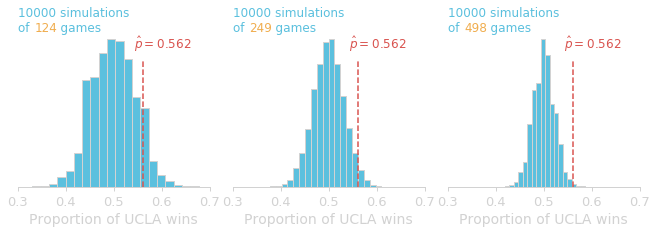

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 3))

ax1.hist(res1, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
ax2.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
ax3.hist(res2, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for ax,games in zip([ax1, ax2, ax3], [n_games1, n_games, n_games2]):
    ax.axvline(phat, ymax=0.82, color=colors["red"], ls="--")
    ax.text(phat-0.02, ax.get_ylim()[1]*0.9, "$\hat{p}=0.562$", size=12, color=colors["red"], ha="left")
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])
    ax.set_xlim(0.3, 0.7)
    ax.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7])
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1], "10000 simulations\nof        games", size=12, color=colors["blue"], ha="left")
    ax.text(ax.get_xlim()[0]+0.035, ax.get_ylim()[1], "{}".format(games), size=12, color=colors["orange"], ha="left")


#plt.tight_layout()
plt.subplots_adjust(left=0.02, bottom=0.17, right=0.98, top=0.89,
                wspace=0.12, hspace=None)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-sample-size.svg", transparent=True)

### Two sided test

In [12]:
delta = phat-0.5
np.sum(res>=0.5+delta), np.sum(res<=0.5-delta), (np.sum(res>=0.5+delta)+np.sum(res<=0.5-delta))/10000

(272, 304, 0.057599999999999998)

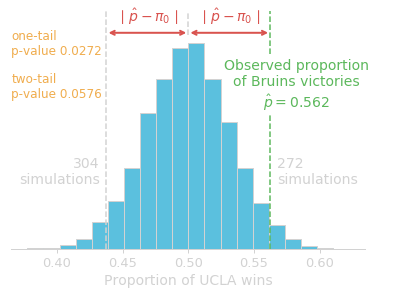

In [13]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()

ax1.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"])

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.63, color=colors["green"], ls="--")
    ax.text(phat+0.02, ax.get_ylim()[1]*0.65, "Observed proportion\nof Bruins victories\n$\hat{p}=0.562$", size=14, color=colors["green"], ha="center")
    ax.text(phat+0.005, ax.get_ylim()[1]*0.3, "{}\nsimulations".format(np.sum(res>=phat)), size=14, color=colors["lightgray"], ha="left")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.9, "one-tail\np-value {}".format(np.sum(res>=phat)/n_simul), size=12, color=colors["orange"], ha="left")

for ax in [ax3]:
    ax.axvline(phat, ymin=0.90, ymax=1.1, color=colors["green"], ls="--", clip_on=False)
    #center of distribution
    ax.axvline(0.5, ymin=0.99, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    #annotations
    ax.text((0.5+phat)/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["red"], ha="center")
    ax.annotate(s='', xy=(0.5,1*ax.get_ylim()[1]), xytext=(phat,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["red"],
                            linewidth=2))
for ax in [ax4]:
    #lower tail
    ax.axvline(1-(phat), ymin=0, ymax=1.1, color=colors["lightgray"], ls="--", clip_on=False)
    ax.text((0.5+(1-(phat)))/2, 1.05*ax.get_ylim()[1], "$\mid\hat{p}-\pi_0\mid$", size=14, color=colors["red"], ha="center")
    ax.annotate(s='', xy=(1-phat,1*ax.get_ylim()[1]), xytext=(0.5,1*ax.get_ylim()[1]), 
             arrowprops=dict(arrowstyle='<->', color=colors["red"],
                            linewidth=2))

for ax in [ax5]:
    ax.text(1-phat-0.005, ax.get_ylim()[1]*0.3, "{}\nsimulations".format(np.sum(res<=(1-phat))), size=14, color=colors["lightgray"], ha="right")
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.7, "two-tail\np-value {}".format((np.sum(res<=(1-phat))+np.sum(res>=phat))/n_simul), size=12, color=colors["orange"], ha="left")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-two-tailed.svg", transparent=True)

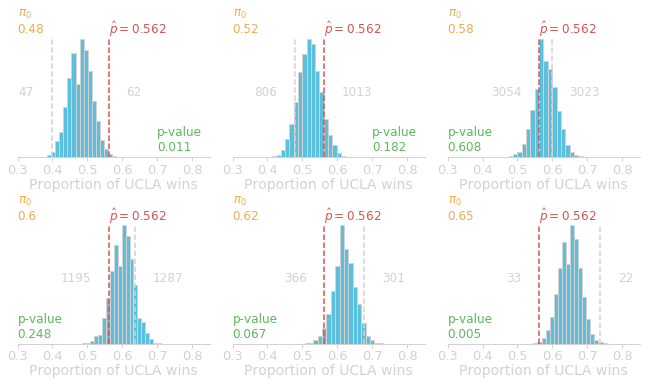

In [9]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(9, 6))

for it,(ax,null) in enumerate(zip([ax1, ax2, ax3, ax4, ax5, ax6],[0.48, 0.52, 0.58, 0.6, 0.62, 0.65])):
    n_simul = 10000
    n_games=249
    res = np.zeros(n_simul)
    for i in range(n_simul):
        sample = np.random.rand(n_games)
        res[i] = np.sum(sample<null)/n_games
    ax.hist(res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])
    ax.set_xlim(0.35, 0.85)
    ax.axvline(phat, ymax=0.95, color=colors["red"], ls="--")
    ax.text(phat, ax.get_ylim()[1], "$\hat{p}=0.562$", size=12, color=colors["red"], ha="left")
    ax.text(ax.get_xlim()[0]-0.05, ax.get_ylim()[1], "$\pi_0$\n{}".format(null), size=12, color=colors["orange"], ha="left")
    if it<2:
        n1 = np.sum(res>=phat)
        n2 = np.sum(res<=(null-(phat-null)))
        ax.text(phat+0.05, ax.get_ylim()[1]*0.5, "{}".format(n1), size=12, color=colors["lightgray"], ha="left")
        ax.text(null-(phat-null)-0.05, ax.get_ylim()[1]*0.5, "{}".format(n2), size=12, color=colors["lightgray"], ha="right")
        ax.axvline(null-(phat-null), ymin=0, ymax=0.95, color=colors["lightgray"], ls="--", clip_on=False)
        ax.text(ax.get_xlim()[1]-0.15, ax.get_ylim()[1]*0.05, "p-value\n{:.3f}".format((n1+n2)/n_simul), size=12, color=colors["green"], ha="left")
    else:
        n1 = np.sum(res<=phat)
        n2 = np.sum(res>=(null-(phat-null)))
        ax.text(phat-0.05, ax.get_ylim()[1]*0.5, "{}".format(n1), size=12, color=colors["lightgray"], ha="right")
        ax.text(null-(phat-null)+0.05, ax.get_ylim()[1]*0.5, "{}".format(n2), size=12, color=colors["lightgray"], ha="left")
        ax.axvline(null-(phat-null), ymin=0, ymax=0.95, color=colors["lightgray"], ls="--", clip_on=False)
        ax.text(ax.get_xlim()[0]-0.05, ax.get_ylim()[1]*0.05, "p-value\n{:.3f}".format((n1+n2)/n_simul), size=12, color=colors["green"], ha="left")

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    ax.set_xlabel("Proportion of UCLA wins", size=14, color=colors["lightgray"], labelpad=1)
    ax.set_xticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    
#plt.tight_layout()
plt.subplots_adjust(left=0.02, bottom=0.17, right=0.98, top=0.89,
                wspace=0.12, hspace=0.5)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-simulation-increasing-null.svg", transparent=True)

# Bootstrap confidence intervals

In [10]:
original_sample = np.zeros(ucla_wins+usc_wins)
original_sample[:ucla_wins] = 1

n_simul = 10000
boot_res = np.zeros(n_simul)

for i in range(n_simul):
    bootstrap_idx = np.random.randint(low=0, high=len(original_sample), size=len(original_sample))
    bootstrap_sample = original_sample[bootstrap_idx]
    boot_res[i]=np.sum(bootstrap_sample)/len(bootstrap_sample)

boot_ci95 = [np.percentile(boot_res, 2.5), np.percentile(boot_res, 97.5)]

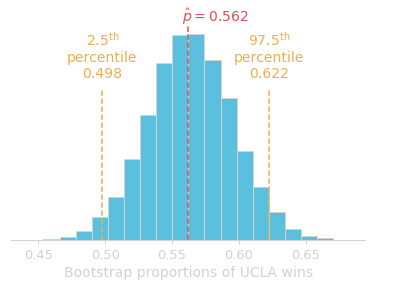

In [11]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
#ax4 = ax1.twinx()
#ax5 = ax1.twinx()

ax1.hist(boot_res, bins=20, edgecolor=colors["lightgray"], color=colors["blue"])

for spine in ["bottom"]:
    ax1.spines[spine].set_linewidth(1)
    ax1.spines[spine].set_color(colors["lightgray"])
for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)

for ax in [ax1]:
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("Bootstrap proportions of UCLA wins", size=14, color=colors["lightgray"])

for ax in [ax2, ax3, ax4, ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")

for ax in [ax2]:
    ax.axvline(phat, ymax=0.99, color=colors["red"], ls="--")
    ax.text(phat+0.02, ax.get_ylim()[1]*1.01, "$\hat{p}=0.562$", size=14, color=colors["red"], ha="center")

for ax in [ax3]:
    ax.axvline(boot_ci95[0], ymin=0, ymax=0.7, color=colors["orange"], ls="--", clip_on=False)
    ax.axvline(boot_ci95[1], ymin=0, ymax=0.7, color=colors["orange"], ls="--", clip_on=False)
    ax.text(boot_ci95[0], ax.get_ylim()[1]*0.75, "$2.5^{{\mathrm{{th}}}}$\npercentile\n{:.3f}".format(boot_ci95[0]), size=14, color=colors["orange"], ha="center")
    ax.text(boot_ci95[1], ax.get_ylim()[1]*0.75, "$97.5^{{\mathrm{{th}}}}$\npercentile\n{:.3f}".format(boot_ci95[1]), size=14, color=colors["orange"], ha="center")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/ucla-usc-bootstrap-ci95.svg", transparent=True)

# NHST vs CIs

In [17]:
def simul_prop(prop, n, n_simul):
    res =  np.zeros(n_simul)
    for i in range(n_simul):
        sample = np.random.rand(n)
        res[i] = np.sum(sample<prop)/n
    return res

def bootstrap_samples(data, nboot=10000):
    data=np.ravel(data)
    idx = np.random.randint(data.size, size=(nboot, data.size))
    return data[idx]

In [18]:
ucla_usc = basketball[basketball.Opponent=="USC"]
ucla_wins = ucla_usc.Wins.values[0]
usc_wins = ucla_usc.Losses.values[0]
n_games = ucla_wins + usc_wins
phat = ucla_wins/n_games

n_simul = 10000

res50 = simul_prop(0.5, n_games, n_simul)
res33 = simul_prop(1/3., n_games, n_simul)
res40 = simul_prop(0.4, n_games, n_simul)

res_boot = bootstrap_samples(np.concatenate([np.zeros(usc_wins), np.ones(ucla_wins)]), n_simul)

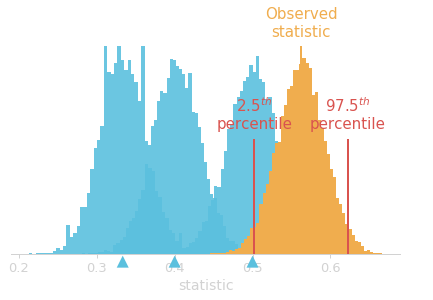

In [65]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.05, 0.13, 0.9, 0.72])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()

for ax in [ax2]:
    ax.hist(res50, bins="auto", color=colors["blue"], alpha=0.9)
    ax.annotate('',
            xy=(0.5, 0), xycoords='data',
            xytext=(0.5, -10), textcoords='data',
            arrowprops=dict(facecolor=colors["blue"], ec="none", shrink=0.5),
            horizontalalignment='right', verticalalignment='top')

for ax in [ax1, ax3, ax4, ax5, ax6]:
    ax.set_ylim(ax2.get_ylim())

for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.axis("off")
    
for ax in [ax1]:
    ax.axvline(phat, ymax=1, color=colors["orange"], lw=2)
    ax.text(phat, ax.get_ylim()[1]*1.05, "Observed\nstatistic", color=colors["orange"],
            size=15, ha="center")
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("statistic", size=14, color=colors["lightgray"])

for ax in [ax3]:
    ax.hist(res40, bins=58, color=colors["blue"], alpha=0.9)
    ax.annotate('',
            xy=(0.4, 0), xycoords='data',
            xytext=(0.4, -10), textcoords='data',
            arrowprops=dict(facecolor=colors["blue"], ec="none", shrink=0.5),
            horizontalalignment='right', verticalalignment='top')

for ax in [ax4]:
    ax.hist(res33, bins=56, color=colors["blue"], alpha=0.9)
    ax.annotate('',
            xy=(1/3, 0), xycoords='data',
            xytext=(1/3, -10), textcoords='data',
            arrowprops=dict(facecolor=colors["blue"], ec="none", shrink=0.5),
            horizontalalignment='right', verticalalignment='top')

for ax in [ax5]:
    ax.hist(res_boot.mean(axis=1), bins=56, color=colors["orange"])
for ax in [ax6]:
    ax.axvline(np.percentile(res_boot.mean(axis=1), 2.5), ymax=0.55, color=colors["red"], lw=2)
    ax.axvline(np.percentile(res_boot.mean(axis=1), 97.5), ymax=0.55, color=colors["red"], lw=2)
    ax.text(np.percentile(res_boot.mean(axis=1), 2.5), ax.get_ylim()[1]*0.6, "2.5$^{th}$\npercentile", color=colors["red"], size=15, ha="center")
    ax.text(np.percentile(res_boot.mean(axis=1), 97.5), ax.get_ylim()[1]*0.6, "97.5$^{th}$\npercentile", color=colors["red"], size=15, ha="center")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/nhst-vs-ci.svg", transparent=True)